In [1]:
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
dataframe_random = pd.read_csv('Random_results.csv')
dataframe_random['Algorithm'] = 'Random'

In [3]:
dataframe_ucb = pd.read_csv('UCB_results.csv')
dataframe_ucb['Algorithm'] = 'UCB'

In [4]:
dataframe_softmax = pd.read_csv('Softmax_results.csv')
dataframe_softmax['Algorithm'] = 'Softmax-tau_01'

In [5]:
dataframe_greedy = pd.read_csv('Epsilon-greedy-Annealing_results.csv')
dataframe_greedy['Algorithm'] = 'Annealing Epsilon Greedy'

In [6]:
dataframe_thomson = pd.read_csv('Thomson-sampling.csv')
dataframe_thomson['Algorithm'] = 'Thomson-sampling'

In [30]:
dataframe_pytorch = pd.read_csv('Pytorch_results.csv')
dataframe_pytorch['Algorithm'] = 'Gradient Descent with Annealing Epsilon Greedy'

In [31]:
dataframe_results = pd.concat((dataframe_random,dataframe_ucb,dataframe_softmax,dataframe_greedy,dataframe_thomson,dataframe_pytorch),axis=0)

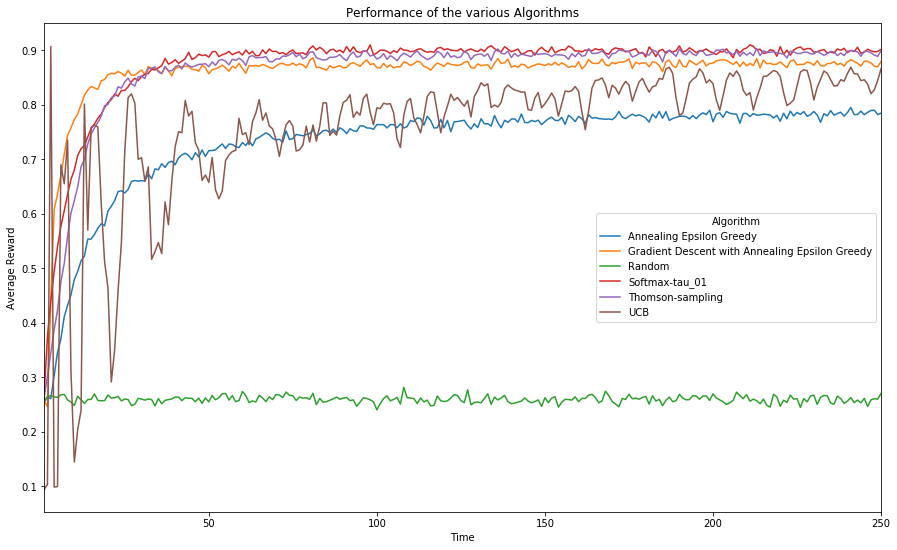

In [32]:
ax = dataframe_results.groupby(["T","Algorithm"]).mean().reset_index().pivot('T','Algorithm','Reward').plot(figsize=(15,9))
ax.set_title("Performance of the various Algorithms")
ax.set_ylabel('Average Reward');
ax.set_xlabel('Time');

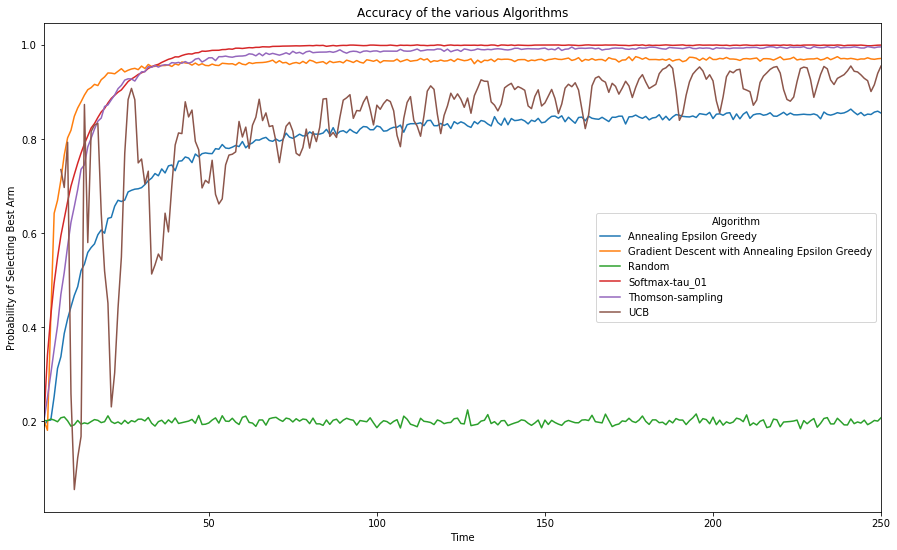

In [33]:
best_arm = 2
df_grouped = dataframe_results.groupby(["T","Algorithm","ChosenArm"]).count()/dataframe_results.Sim.max()
df_grouped  = df_grouped .reset_index()
ax = df_grouped[df_grouped['ChosenArm'] == float(best_arm)].pivot('T','Algorithm','Reward').plot(figsize=(15,9))
ax.set_title("Accuracy of the various Algorithms")
ax.set_ylabel('Probability of Selecting Best Arm');
ax.set_xlabel('Time');

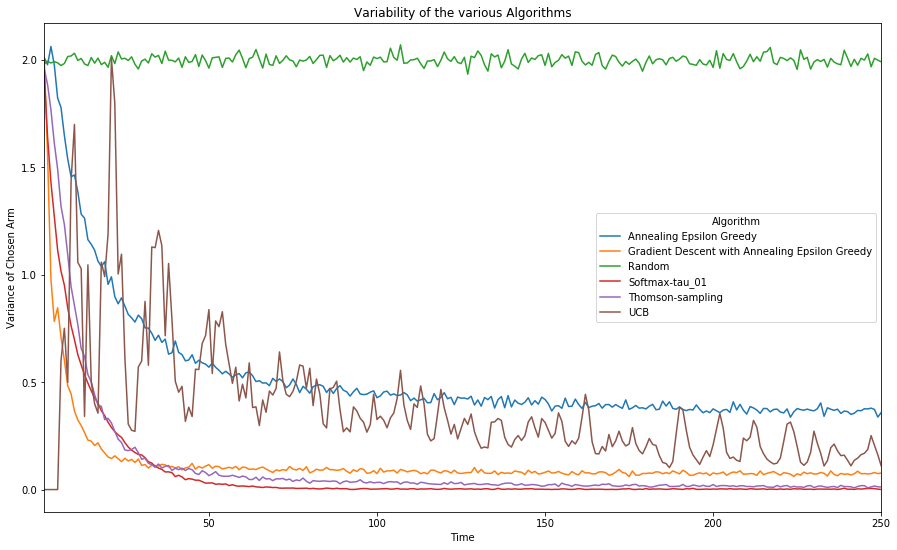

In [34]:
ax = dataframe_results.groupby(["T","Algorithm"]).var().reset_index().pivot('T','Algorithm','ChosenArm').plot(figsize=(15,9))
ax.set_title("Variability of the various Algorithms")
ax.set_ylabel('Variance of Chosen Arm');
ax.set_xlabel('Time');

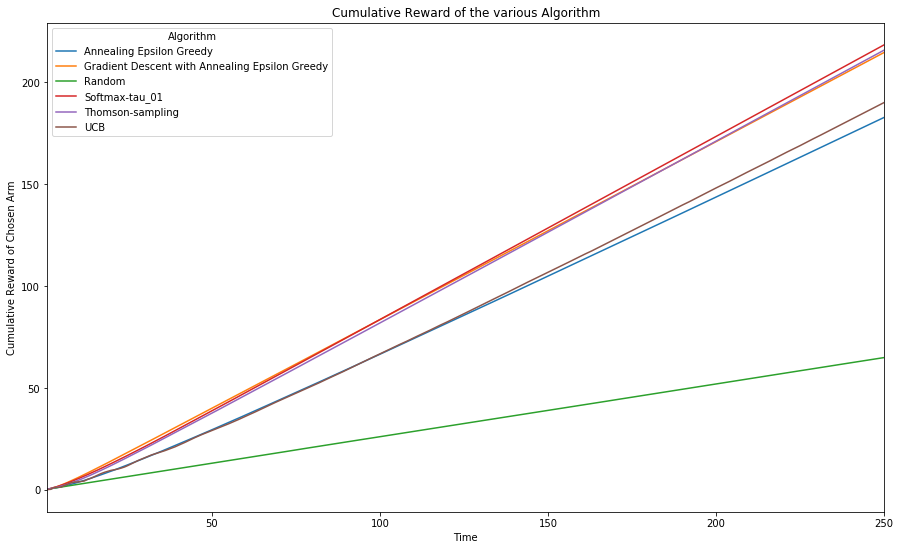

In [35]:
ax = dataframe_results.groupby(["T","Algorithm"]).mean().reset_index().pivot('T','Algorithm','CumulativeReward').plot(figsize=(15,9))
ax.set_title("Cumulative Reward of the various Algorithm")
ax.set_ylabel('Cumulative Reward of Chosen Arm');
ax.set_xlabel('Time');